## Week09

**Background**: For us to model the dynamics of surveillance data we will need to be able to compare simulated trajectories of incident cases, deaths, hospitalizations to trajectories that are collected from a surveillance system. 

**Goal**: To simulate  and explore dynamical systems that estimate the proportion of animals in one of a finite number of disease states.

- Simulation
    - Simulate SIR model 
    - Simulate SIS model 
    - Simulate SEIR model 
- Adding Stochasticity 
    - Observational noise  

### Simulate SIR model 

#### model
The SIR model assumes that individuals are in one of three disease states: (S)usceptible, (I)nfected, and (R)emoved. 
This model further assumes that the proportion of individuals who move from S to I and I to R follow the below system of differential equations. 

\begin{align}
\frac{ds}{dt} &= -\beta s i \\ 
\frac{di}{dt} &= \beta s i - \gamma i \\ 
\frac{dr}{dt} &= \gamma i \\ 
s(0) &= S_{0} \\
i(0) &= I_{0} \\ 
r(0) &= R_{0} 
\end{align}

where $s(0)$, $i(0)$, and $r(0)$ represent the proportion of susceptible, infected, and removed individuals in the population at time 0. These are called **initial conditions**.

The SIR model also assumes that the population is **closed**---that no one enters or leaves the system and assumes that the population is **well-mixed**---that all indivivudals come in contact with one another at each time step.
Because the system is closed $s+i+r=1$. 

The SIR model includes two parameters $\theta = (\beta, \gamma)$ that control how the proprotion of s, i, and r move over time.
The parameter $\gamma$ is the rate at which the proportion of infected individuals move to the "removed" state. 
The parameter $\beta$ is often called wither the force of infection or the effective contact rate and is a combination of the average number of contacts per individual $k$, the probability that the infectious agent of interest is transmiteed during a contact between a susceptible and infectious individual, and the duration of infection. 

We can estimate the proportion of susceptibles over time $s(t)$, proportion of infected $i(t)$, and proportion of removed $r(t)$ over time by using a numerical integration routine.

#### packages needed
The `scipy` package includes a function titled `solve_ivp` that will allow us to estimate $[s(t), i(t), r(t)]$.
Documentation for the `solve_ivp` is here = [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

In [251]:
from scipy.integrate import solve_ivp
import numpy as np              #--for computation
import matplotlib.pyplot as plt #--for plotting

This function requires three arguments:
- A function that represents our system of differential equations
- A tuple (start,end) that asks solve_ivp to return s, i, r from start to end.  
- An array that contains initial conditions (i.e. s(0), i(0), r(0)). 

We will also provide two optional arguments to solve_ivp: `tval` and `args`.
`tval` is an argument that accepts an array of times between start and end and returns s, i ,r for these times.  
`args` is a tuple that contains additional arguments to the function that represents our system of differential equations. For the SIR model our additional parameters are beta and gamma. 

### Step one: Function that represents our system of differential equations 

In [252]:
def sir(t,y, beta, gamma):
    s,i,r = y
    ds_dt = -beta*s*i
    di_dt = beta*s*i - gamma*i
    dr_dt = gamma*i
    return [ds_dt, di_dt, dr_dt]

The function above takes two required arguments: `t` time and `y` a vector of the states in the system.
For the SIR model we have three possible disease states: s, i, r. 
We also include two additional arguments: beta and gamma. 

### Step two: Start and End time

In [253]:
start = 0    #--start at day 0
end   = 20  #--end at day 100 (101 time points)

### Step three:  Initial conditions

In [254]:
#--set the proportion of s,i,r at time 0. 
r0 = 0.
i0 = 0.01
s0 = 1. - i0

initial_conditions = (s0,i0,r0)

### Step four: Set time points to return states 

In [255]:
tvals = np.arange(start, end+0.5, 0.5)

### Step five: Set parameters

In [256]:
beta, duration = 1.25*1.5, 1./(1.5)
gamma = 1./duration

### Integrating the system.
Our final step is to plug in all of the above steps in the `solve_ivp` function. 
We will store the results of solve_ivp in an object called `solution`. 
The `solution` object will contain a matrix of `solution.y` where the first column is $s(t)$ at a vector of times (`solution.t`) that we defined by `tvals`. The second column is $i(t)$ and the third column is $r(t)$.  

In [257]:
solution = solve_ivp( fun = sir
                     , t_span = (start,end)
                     , y0     = initial_conditions
                     , t_eval = tvals
                     , args   = (beta, gamma) )

In [258]:
times = solution.t
sir   = solution.y 

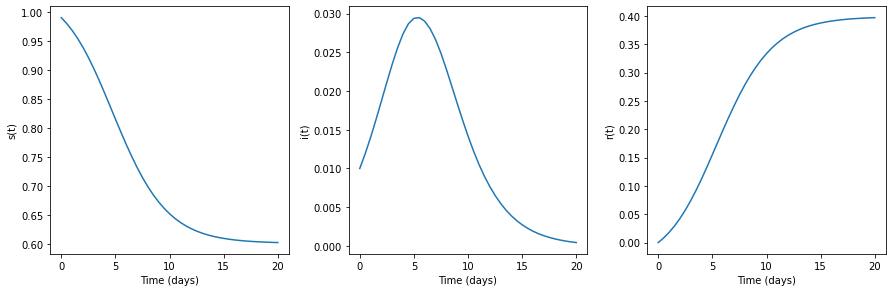

In [259]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12.5,12.5/3)

ax = axs[0]
ax.plot(times,sir[0,:])
ax.set_xlabel("Time (days)", fontsize=10)
ax.set_ylabel("s(t)", fontsize=10)

ax = axs[1]
ax.plot(times,sir[1,:])
ax.set_xlabel("Time (days)", fontsize=10)
ax.set_ylabel("i(t)", fontsize=10)

ax = axs[2]
ax.plot(times,sir[2,:])
ax.set_xlabel("Time (days)", fontsize=10)
ax.set_ylabel("r(t)", fontsize=10)

fig.set_tight_layout(True) #--adjust graph to fit labels

**QSA**: Why did we observe an outbreak (defined as a positive i(t) over some period of time) for this SIR model?

**QSA**: What three items in the model could we change to prevent an outbreak?

### The SIS model

#### model
The SIS model assumes that individuals are in one of two states: susceptible or infectious and that the rates of change for s and i follow 

\begin{align}
    \frac{ds}{st} &= -\beta s i + \gamma i \\ 
    \frac{di}{st} &=  \beta s i - \gamma i \\ 
\end{align}

## HOMEWORK PROBLEM ONE
Please use the above template for the SIR model to integrate and plot the solution for an SIS model with 
Parameters $\beta = 4.0$ and $\gamma = 1/1./3.45$. 
Assume the initial conditions are $s_{0} = 0.99$ and $i_{0} = 0.01$.
Estimate the system from 0 to 100 for time steps of 0.1

Create three plots.
One plot of the proportion of susceptibles over time
One plot of the proportion of infected over time
One plot of the proportion of infected over time where the ylimits of the plot are from 0.135 to 0.140. Use the `set_ylim` function to scale the ylimits.

### HOMEWORK PROBLEM TWO

The SEIRS model follows the below system of differential equations

\begin{align}
    \frac{ds}{dt} &= -\beta s i + \phi r  \\ 
    \frac{de}{dt} &=  \beta s i - \sigma e \\ 
    \frac{di}{dt} &=  \sigma e - \gamma i \\ 
    \frac{dr}{dt} &=  \gamma i - \phi r \\ 
     s(0)& = S_{0}; \; e(0) = E_{0} \\ 
     i(0)& = I_{0}; \; r(0) = R_{0} 
\end{align}

Please use the above template for the SIR and SIS model to integrate and
plot the solution for an SEIRS model with 
```
initial_conditions = (0.98, 0.01, 0.01, 0.0)
beta, gamma, sigma, phi  = 4, 2.75, 3, 1./15
```
Estimate the system from 0 to 75
for time steps of 0.1

Create three plots. One plot of the proportion of susceptibles over time
One plot of the proportion of infected over time One plot of the
proportion of infected over time where the ylimits of the plot are from
0.135 to 0.140. Use the \texttt{set\_ylim} function to scale the
ylimits.


## HOMEWORK PROBLEM THREE-PARTI (incidence)

Lets add realism to our SEIRS model by assuming that a surveillance system see only a noisy realiztions of the states of our model (S,E,I,R). 
To do this, we will assume that our surveillance system is collecting incident cases of an infectious agent $\mathcal{D} = (y_{1}, y_{2}, y_{3}, \cdots, y_{t})$
that are samples from a poisson distribution with parameter 
$\lambda(t) = \textrm{incident\_cases}(t)$
where we compute $\textrm{incident\_cases}(t)$ from our SEIRS model.

Step one of homework: computing incident cases. 
The SEIRS model above returns the proportion of prevalent infections $i(t)$ but does not return the proportion of **incident i**. 
Individuals that count towards incident cases are those that leabe E and move to I. 
We know from our model that $\sigma E$ leave the E disease state and move to I. 

The proportion of cumulative incident cases can be estimated by including a new state in our system 
\begin{align}
    \frac{dc}{dt} = \sigma e
\end{align}
We will also assume that at time $0$ the proportion of incident cases is equal to the proportion of prevalent cases $(i(t))$---$c(0) = i(0)$. 

Our new SEIRS model follows the below system of differential equations

\begin{align}
    \frac{ds}{dt} &= -\beta s i + \phi r  \\ 
    \frac{de}{dt} &=  \beta s i - \sigma e \\ 
    \frac{di}{dt} &=  \sigma e - \gamma i \\ 
    \frac{dr}{dt} &=  \gamma i - \phi r \\
    \frac{dc}{dt} &= \sigma e\\
     s(0)& = S_{0}; \; e(0) = E_{0} \\ 
     i(0)& = I_{0}; \; r(0) = R_{0}; \; c(0) = I_{0} 
\end{align}

The state $c$ returns the proportion of *cumulative* incident infections. 
If you stored the cumulative proportion of incident infections as the variable `c` then to compute the proportion of incident infecitons we can use the `numpy.diff` function and write 
```
import numpy as np
inc = np.diff(c)
```

Please use the above template to integrate and plot the proportion of incidenct cases for an SEIRS model with 
Parameters $\beta = 4.$, $\gamma = 2.75$, $\sigma = 3.$, and $\phi = 1/15$. 
Assume the initial conditions are $s_{0} = 0.99$, $e_{0} = 0.01$, $i_{0} = 0.01$, $r_{0} = 0.$, $c_{0} = 0.01$.
Estimate the system from 0 to 75 for time steps of 0.1

Create one plot of the proportion of incident infection over time. 

## HOMEWORK PROBLEM THREE-PARTII (Observational noise)

Lets assume that our system includes $N=10^3$ individuals. 
We can compute the numnber of incident cases as

\begin{align}
    \textrm{num\_inc(t)} = N \textrm{inc}(t)
\end{align}

Now that we have collected the number of incident cases $num\_inc(t)$ we can add observational noise by sampling from $T$ random variables $(Y_{1}, Y_{2}, \cdots, Y_{T})$ where 

\begin{align}
    Y_{i} \sim \textrm{Pois} ( \textrm{num\_inc}(t) )
\end{align}

We can add observational noise to our vector of incident cases by using the function `poisson` from the package `numpy.random`. Here is the documentation for that package [https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html). 


Please create one plot that includes the true number of incident cases $\textrm{inc}(t)$ and also one random realization of incident cases over time. 